In [1]:
# Downloading dataset from URL
medical_charge_url='https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'
from urllib.request import urlretrieve
urlretrieve(medical_charge_url,'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x1d0df6f10d0>)

In [2]:
# Importing Libraries
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

<b>Dataset Visualization

In [3]:
# Exploratory analysis/Visualization
medical_data=pd.read_csv('medical.csv')
medical_data.info()
medical_data.describe()

# Setting styling on visualization
sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(10,6)
matplotlib.rcParams['figure.facecolor']='#000000'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# Plotting distribution of Age,BMI,children
# Here nbins(no of bins) calculated as (max-age - min-age)=47
# marginal='box'give all other numercal values such as mean,median max min in digramatically

fig=px.histogram(medical_data,x='age',marginal='box',color='smoker',nbins=47,title='Distribution of Age')
fig.update_layout(bargap=0.2)
fig.show()

fig=px.histogram(medical_data,x='bmi',marginal='box',color_discrete_sequence=['green'],title='Distribution of BMI')
fig.update_layout(bargap=0.5)
fig.show()

fig=px.histogram(medical_data,x='children',marginal='box',color_discrete_sequence=['purple'],title='Distribution of Children')
fig.update_layout(bargap=0.5)
fig.show()

In [ ]:
#This only shows counts or sums of values, not the relationship between two variables.

# Plotting charges (dependent variable) with smoker (independent variable)
fig = px.histogram(
    medical_data,
    x='charges',
    marginal='box',
    color='smoker',
    color_discrete_sequence=['green','purple'],
    title="Annual Medical Charges"
)
fig.update_layout(bargap=0.2)
fig.show()
# -- It is clear from the figure that smokers have greater charges than non-smokers

# Plotting charges (dependent variable) with sex (independent variable)
fig = px.histogram(
    medical_data,
    x='charges',
    marginal='box',
    color='sex',
    color_discrete_sequence=['green','purple'],
    title="Annual Medical Charges"
)
fig.update_layout(bargap=0.2)
fig.show()
# -- This shows that charges are not fully dependent on sex, 
#    as both male and female medians are nearly the same

# Plotting charges (dependent variable) with region (independent variable)
fig = px.histogram(
    medical_data,
    x='charges',
    marginal='box',
    color='region',
    color_discrete_sequence=['green','purple','grey','blue'],
    title="Annual Medical Charges"
)
fig.update_layout(bargap=0.2)
fig.show()
# -- This indicates that charges are not fully dependent on region, 
#    as all regions have nearly similar medians


In [6]:
# visualizing more about smoker column
medical_data.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

<b>For visualizing the number of data points and the relationship between two variables,
we use a scatter plot (after looking at histograms for distribution)</b>

In [7]:
# Visualizing the relationship between age and charges
fig = px.scatter(
    medical_data,
    x='age',
    y='charges',
    color='smoker',
    opacity=0.8,
    hover_data='sex',
    title='Age Vs Charges'
)
fig.update_traces(marker_size=5)
fig.show()

# Visualizing the relationship between BMI and charges
fig = px.scatter(
    medical_data,
    x='bmi',
    y='charges',
    color='smoker',
    opacity=0.8,
    hover_data='sex',
    title='BMI Vs Charges'
)
fig.update_traces(marker_size=5)
fig.show()

# Insight:
# - For smokers, increasing BMI appears to be associated with higher medical charges.
# - For non-smokers, there seems to be no clear relationship between BMI and charges.

<b>Finding relation also using correlation coefficient</b>

0.29900819333064765 0.19834096883362892 0.06799822684790487 0.7872514304984772
               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


Text(0.5, 1.0, 'Correlation Matrix')

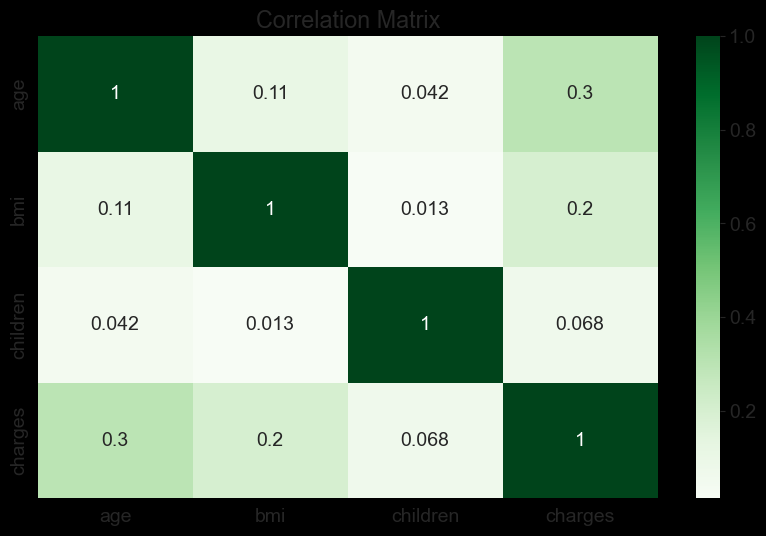

In [8]:
# correlation coefficient(shows how  much y(charges) changes when x(age,bmi,children,smoker,sex,region) changes 
# by one unit)

ageco=medical_data.charges.corr(medical_data.age)
bmico=medical_data.charges.corr(medical_data.bmi)
childco=medical_data.charges.corr(medical_data.children)

# For categorical data like smoker(yes or no)-->first convert it to numerical data(0 or 1)
smoker_values={'no':0,'yes':1}
smoker_numeric=medical_data.smoker.map(smoker_values)
smokerco=medical_data.charges.corr(smoker_numeric)
print(ageco,bmico,childco,smokerco)

# full correlation matrix for numeric columns only
print(medical_data.select_dtypes(include='number').corr())

# Using seaborn matrix visualization
sns.heatmap(medical_data.select_dtypes(include='number').corr(), cmap='Greens', annot=True)
plt.title('Correlation Matrix')

#--From here we can see that smoker have most greatest correleation
#-- It means it have a stronger relation with charges then age. 

<b>Now We can start building machine learning model according to visualized data</b>

<b>Linear Regression using a Single Feature(Age with Non-smoker Category)

<Axes: title={'center': 'Age vs charges for Non-smoker only'}, xlabel='age', ylabel='charges'>

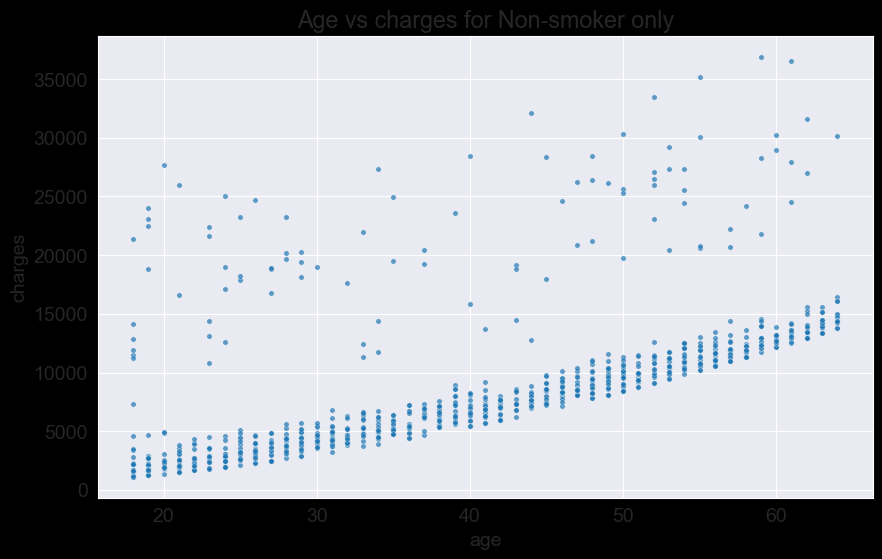

In [9]:
# Taking only non-smoker person data from main dataset
non_smoker=medical_data[medical_data.smoker=='no']

plt.title('Age vs charges for Non-smoker only')
sns.scatterplot(data=non_smoker,x='age',y='charges',alpha=0.7,s=15)

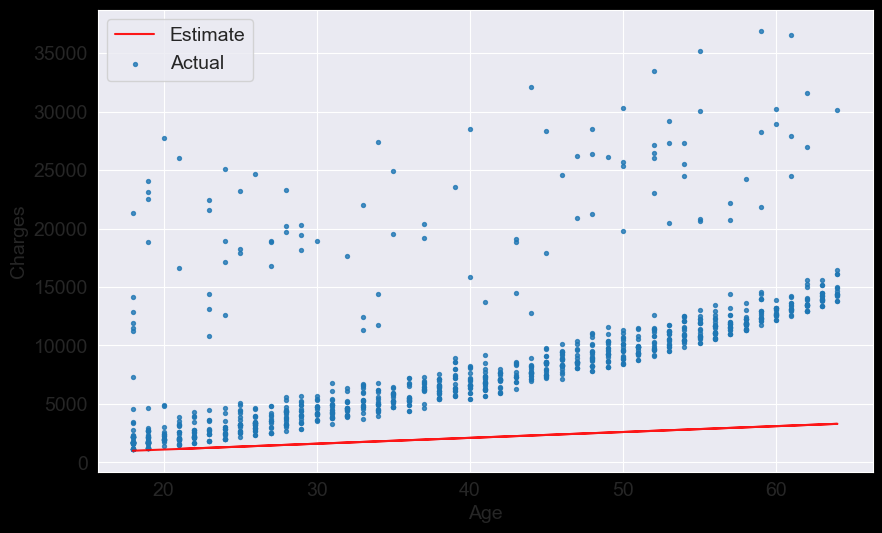

In [10]:
# First Ml model(linear regression model)
def estimate_charge(w,b,age):
    return w*age+b

actual_charges=non_smoker.charges
actual_ages = non_smoker.age
estimated_charges = estimate_charge(50, 100, actual_ages)

# ploting how the estimated(taking w=50 & b=100) and real charges are closed 
#  shows how the model is accurate visually
plt.plot(actual_ages,estimated_charges,'r',alpha=0.9)
plt.scatter(actual_ages,actual_charges,s=8,alpha=0.8)
plt.xlabel("Age")
plt.ylabel("Charges")
plt.legend(['Estimate','Actual'])

# Now the problem is to finding the value of w & b so that line is fit to actual data
def try_parameters(w,b):
    actual_ages=non_smoker.age
    actual_charges=non_smoker.charges
    
    estimated_charges=estimate_charge(w,b,actual_ages)
    
    plt.plot(actual_ages,estimated_charges,'r',alpha=0.9)
    plt.scatter(actual_ages,actual_charges,s=8,alpha=0.8)
    plt.xlabel("Age")
    plt.ylabel("Charges")
    plt.legend(['Estimate','Actual'])

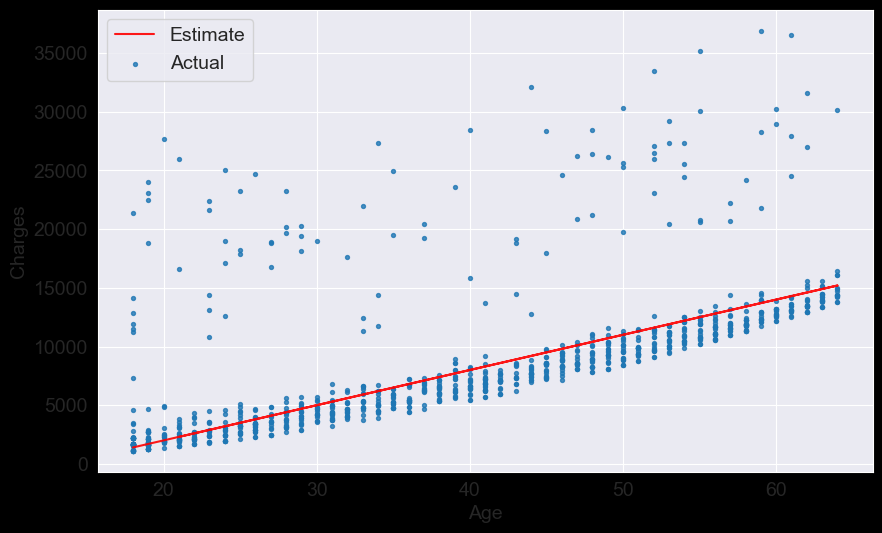

In [11]:
try_parameters(300,-4000)

In [12]:
# Now each time predicting w & b(try_parameters()) we don't know the numerical difference between predicted and 
# actual data, as computer have no eyes so it's neede numerical data to predict
# So we have to calculate root mean squared error (RMSE).

import numpy as np
def rmse(target,prediction):
    return np.sqrt(np.mean(np.square(target-prediction)))

def try_parameters_with_loss(w,b):
    actual_ages=non_smoker.age
    actual_charges=non_smoker.charges
    
    estimated_charges=estimate_charge(w,b,actual_ages)
    
    plt.plot(actual_ages,estimated_charges,'r',alpha=0.9)
    plt.scatter(actual_ages,actual_charges,s=8,alpha=0.8)
    plt.xlabel("Age")
    plt.ylabel("Charges")
    plt.legend(['Estimate','Actual'])
    
    # Loss checking function
    loss=rmse(actual_charges,estimated_charges)  # our goal is to minimze the loss possible
    print("RMSE LOSS :",loss)

RMSE LOSS : 4725.9133994520325


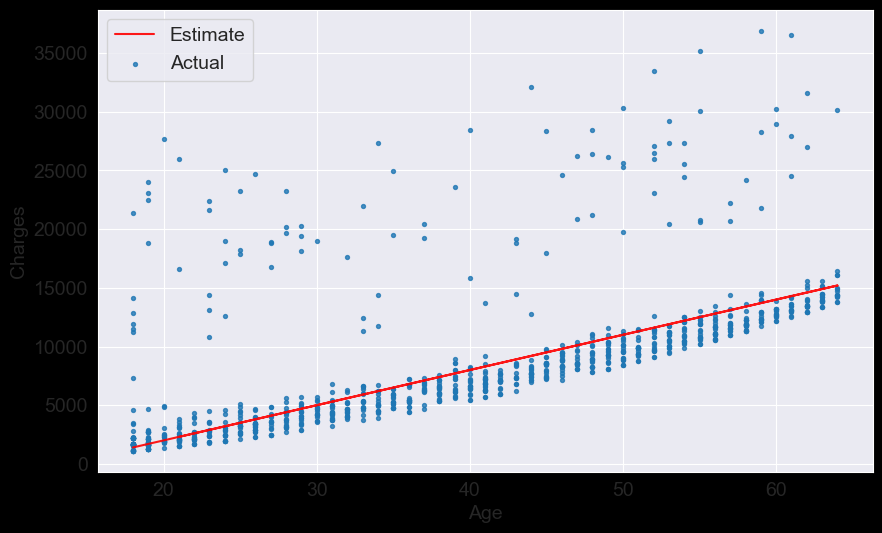

In [13]:
try_parameters_with_loss(300,-4000)

Next Stratigy is to modify w and b such that loss is minimum as possible<br>
there are two methods:
<li>ordinary least square(Better for small dataset)</li>
<li>stochastic gradient descent(Better for large dataset)<--we use this</li> 

In [14]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [15]:
inputs=non_smoker[['age']]
target=non_smoker.charges
model.fit(inputs,target) # Loss function is already calculated by fit method internally

model.predict(np.array([[23],[37],[50]])) #<--manually giving some age value to the model

c:\Users\achin\anaconda3\envs\machine_learning\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 11271.02508499])

[2719.0598744  5391.54900271 6727.79356686 ... 2719.0598744  2719.0598744
 3520.80661289]
RMSE LOSS : 4662.505766636395


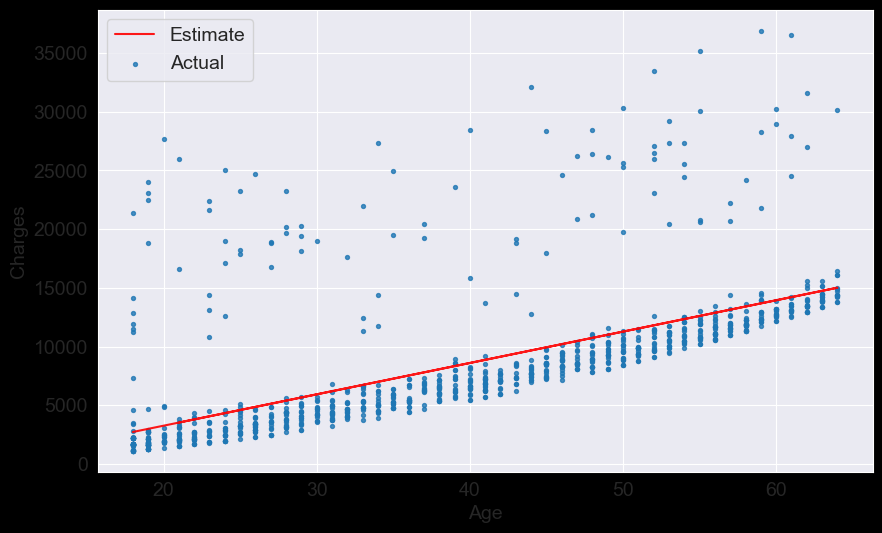

In [16]:
predictions=model.predict(inputs)
print(predictions)

try_parameters_with_loss(model.coef_,model.intercept_)

<b>Linear Regression using a Single Feature(Age with Smoker Category)

In [17]:
smoker_data=medical_data[medical_data.smoker=='yes']
def try_parameters_with_loss(w,b):
    actual_ages=smoker_data.age
    actual_charges=smoker_data.charges
    
    estimated_charges=estimate_charge(w,b,actual_ages)
    
    plt.plot(actual_ages,estimated_charges,'r',alpha=0.9)
    plt.scatter(actual_ages,actual_charges,s=8,alpha=0.8)
    plt.xlabel("Age")
    plt.ylabel("Charges")
    plt.legend(['Estimate','Actual'])
    
    # Loss checking function
    loss=rmse(actual_charges,estimated_charges)  # our goal is to minimze the loss possible
    print("RMSE LOSS :",loss)

RMSE LOSS : 10711.00334810241


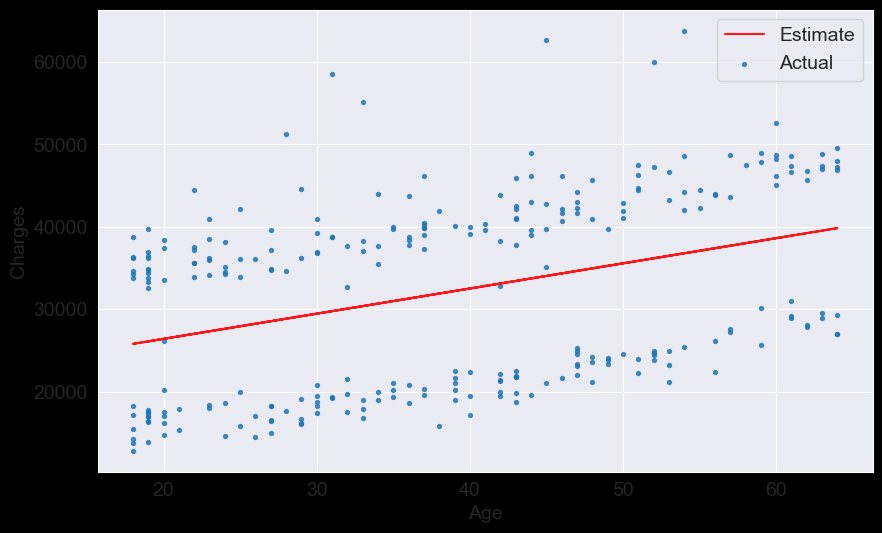

In [18]:
model=LinearRegression()
inputs=smoker_data[['age']]
target=smoker_data.charges
model.fit(inputs,target)

prediction=model.predict(inputs)

try_parameters_with_loss(model.coef_,model.intercept_)

Linear Regression using Multiple Features

In [19]:
# Adding BMI
inputs=non_smoker[['age','bmi']]
target=non_smoker.charges
model=LinearRegression().fit(inputs,target)
predictions=model.predict(inputs)
loss=rmse(target,predictions)
print("loss:",loss)
print("Correlation of BMI:",medical_data.charges.corr(medical_data.bmi))

loss: 4662.3128354612945
Correlation of BMI: 0.19834096883362892


In [20]:
print("W :",model.coef_,"\nB :",model.intercept_)

W : [266.87657817   7.07547666] 
B : -2293.632090648869


In [21]:
# Adding Children
inputs=non_smoker[['age','bmi','children']]
target=non_smoker.charges
model=LinearRegression().fit(inputs,target)
predictions=model.predict(inputs)
loss=rmse(target,predictions)
print("loss:",loss)
print("Correlation of children:",medical_data.charges.corr(medical_data.children))

loss: 4608.470405038246
Correlation of children: 0.06799822684790487


In [22]:
# For Whole dataset(not just only non smoker category)
inputs=medical_data[['age','bmi','children']]
target=medical_data.charges
model=LinearRegression().fit(inputs,target)
predictions=model.predict(inputs)
loss=rmse(target,predictions)
print("loss:",loss)

loss: 11355.317901125973


<b>Using Categorical Features for Machine Learning

In [23]:
# adding smoker feature(binary category) in model
smoker_bin = {'yes': 1, 'no': 0}
medical_data['smoker_bin'] = medical_data.smoker.map(smoker_bin)
print(medical_data)

      age     sex     bmi  children smoker     region      charges  smoker_bin
0      19  female  27.900         0    yes  southwest  16884.92400           1
1      18    male  33.770         1     no  southeast   1725.55230           0
2      28    male  33.000         3     no  southeast   4449.46200           0
3      33    male  22.705         0     no  northwest  21984.47061           0
4      32    male  28.880         0     no  northwest   3866.85520           0
...   ...     ...     ...       ...    ...        ...          ...         ...
1333   50    male  30.970         3     no  northwest  10600.54830           0
1334   18  female  31.920         0     no  northeast   2205.98080           0
1335   18  female  36.850         0     no  southeast   1629.83350           0
1336   21  female  25.800         0     no  southwest   2007.94500           0
1337   61  female  29.070         0    yes  northwest  29141.36030           1

[1338 rows x 8 columns]


In [24]:
inputs=medical_data[['age','bmi','children','smoker_bin']]
target=medical_data.charges
model=LinearRegression().fit(inputs,target)
predictions=model.predict(inputs)
loss=rmse(target,predictions)
print("loss:",loss)
print("Correlation of smoker category:",medical_data.charges.corr(medical_data.smoker_bin))

loss: 6056.439217188081
Correlation of smoker category: 0.7872514304984772


In [25]:
#same for sex data ->convert to binary number
sex_bin={'female':0,'male':1}
medical_data['sex_bin']=medical_data.sex.map(sex_bin)

In [26]:
inputs=medical_data[['age','bmi','children','smoker_bin','sex_bin']]
target=medical_data.charges
model=LinearRegression().fit(inputs,target)
predictions=model.predict(inputs)
loss=rmse(target,predictions)
print("loss:",loss)
print("Correlation of sex category:",medical_data.charges.corr(medical_data.sex_bin))

loss: 6056.100708754546
Correlation of sex category: 0.057292062202025415


<b>For Region column we use one hot encoding

In [27]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(medical_data[['region']])

,categories,'auto'
,drop,None
,sparse_output,True
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,min_frequency,None
,max_categories,None
,feature_name_combiner,'concat'


In [28]:
one_hot = enc.transform(medical_data[['region']]).toarray()
medical_data[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot
medical_data

,age,sex,bmi,children,smoker,region,charges,smoker_bin,sex_bin,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [29]:
inputs=medical_data[['age','bmi','children','smoker_bin','sex_bin','northeast','northwest','southeast','southwest']]
target=medical_data.charges
model=LinearRegression().fit(inputs,target)
predictions=model.predict(inputs)
loss=rmse(target,predictions)
print("loss:",loss)

loss: 6041.679651174452


<b>As the current loss after taking whole dataset and all feature is 6041.679651174452 . As smoker have higher corelation and after dividing the data into smoker and non-smoker we get least loss,so we do that now

In [32]:
# Make sure non_smoker is a full copy, not a slice view
non_smoker = medical_data[medical_data.smoker == 'no'].copy()

sex_bin={'female':0,'male':1}
non_smoker['sex_bin']=non_smoker.sex.map(sex_bin)

from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(non_smoker[['region']])
one_hot = enc.transform(non_smoker[['region']]).toarray()
non_smoker[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

inputs=non_smoker[['age','bmi','children','sex_bin','northeast','northwest','southeast','southwest']]
target=non_smoker.charges
non_smoker_model=LinearRegression().fit(inputs,target)
predictions=non_smoker_model.predict(inputs)
loss=rmse(target,predictions)
print("loss:",loss)

loss: 4573.074988795492


In [33]:
# Make sure non_smoker is a full copy, not a slice view
smoker = medical_data[medical_data.smoker == 'yes'].copy()

sex_bin={'female':0,'male':1}
smoker['sex_bin']=smoker.sex.map(sex_bin)

from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(smoker[['region']])
one_hot = enc.transform(smoker[['region']]).toarray()
smoker[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

inputs=smoker[['age','bmi','children','sex_bin','northeast','northwest','southeast','southwest']]
target=smoker.charges
smoker_model=LinearRegression().fit(inputs,target)
predictions=smoker_model.predict(inputs)
loss=rmse(target,predictions)
print("loss:",loss)

loss: 5668.4678821121515


Now the model can predict at loss 4573.074988795492(non-smoker) and 5668.4678821121515(smoker) - which is lesser than taking whole dataset

Deploying Model

In [ ]:
import pickle
with open('non_smoker_model.pkl','wb') as f:
    pickle.dump(non_smoker_model,f)
    

In [36]:
with open('smoker_model.pkl','wb') as f:
    pickle.dump(smoker_model,f)